In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
n_clusters = 4
input_file = Path("../../data/kmeans_result/cyfeatures_{}clusters_PCA.csv".format(n_clusters))

In [18]:
df = pd.read_csv(input_file)
years = [n[0:4] for n in df.Name]
models =  [n[5:9] for n in df.Name]
ssps = [n[10:] for n in df.Name]

df['year'] = years
df['model'] = models
df['ssp'] = ssps

In [20]:
df

,Name,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,cluster,is_centroid,selected,year,model,ssp
0,2016_BCCS_SP126,-0.738784,-0.370123,0.774412,0.385211,1.115534,-0.013707,2,False,True,2016,BCCS,SP126
1,2017_BCCS_SP126,-1.787125,-0.268056,3.611331,-2.433014,2.020648,0.489153,2,False,False,2017,BCCS,SP126
2,2018_BCCS_SP126,-1.058616,0.430343,2.517404,0.451688,-0.257641,-0.233748,3,False,False,2018,BCCS,SP126
3,2019_BCCS_SP126,-0.713411,0.205389,-0.654900,2.736790,0.720307,1.461175,3,False,False,2019,BCCS,SP126
4,2020_BCCS_SP126,-1.626070,0.350405,0.032230,0.430577,1.522441,-0.149555,2,False,True,2020,BCCS,SP126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2056_AWCM_SP245,-1.956478,1.353940,0.658896,-0.428764,-0.185719,-0.337909,3,False,False,2056,AWCM,SP245
286,2057_AWCM_SP245,-0.446330,0.546475,-0.555941,-0.590036,1.111434,1.297887,1,False,False,2057,AWCM,SP245
287,2058_AWCM_SP245,-0.845474,1.439150,-0.057398,1.380366,-0.840400,-0.563963,3,False,True,2058,AWCM,SP245
288,2059_AWCM_SP245,-0.058544,-0.493381,-1.852367,1.939591,-0.086567,1.704986,0,False,False,2059,AWCM,SP245


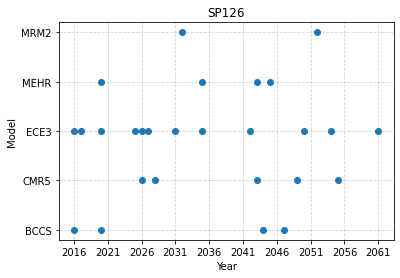

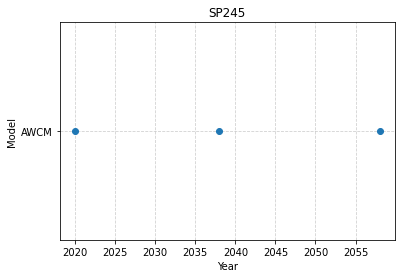

In [35]:
for ssp in np.unique(ssps):
    df_SSPselect = df[df.ssp == ssp]
    df_select = df_SSPselect[df_SSPselect.selected == True]
    
    x = df_select.year.astype(int).values
    y = pd.factorize(df_select.model)[0]  # Convert model names to integers
    
    # Set x-axis ticks every 5 years
    min_year, max_year = x.min(), x.max()
    plt.xticks(np.arange(min_year, max_year + 1, 5))  # Tick marks every 5 years
    
    plt.plot(x, y, 'o')
    plt.xlabel("Year")
    plt.ylabel("Model")
    plt.title(ssp)
    plt.yticks(ticks=np.arange(len(np.unique(df_select.model))), labels=np.unique(df_select.model))  # Preserve labels
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.savefig("../../data/graph_selection_{}.png".format(ssp))
    plt.show()